In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
data = pd.read_csv('EpilepticPredictiveAnalytics.csv')

In [3]:
data.shape

(11493, 180)

In [4]:
data.head(10)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [5]:
data.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [6]:
# Display initial data info
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11493 entries, 0 to 11492
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB
None


In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# import plotly
# import plotly.figure_factory as ff
# from plotly import tools
# from plotly.offline import init_notebook_mode, iplot

import imblearn


import seaborn as sns

# init_notebook_mode(connected=True)
# pd.set_option('display.max_columns', 100)

In [8]:
data.shape

(11493, 180)

In [9]:
data['y'].value_counts()

y
4    2300
2    2299
1    2298
5    2298
3    2298
Name: count, dtype: int64

<Axes: >

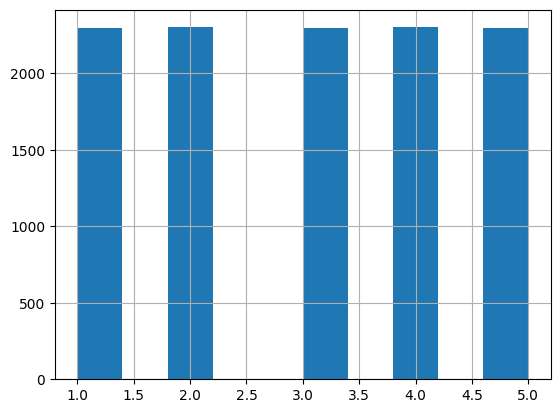

In [10]:
data.y.hist()

In [11]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)

In [12]:
print(data['y'].value_counts())

y
0    9195
1    2298
Name: count, dtype: int64


In [13]:
data.head(10)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,0
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,0
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,0
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,0


In [14]:
data = data.drop('Unnamed', axis = 1)

In [15]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,...,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000,11493.000000
mean,-11.600104,-10.941269,-10.206822,-9.149221,-7.998521,-6.966501,-6.451057,-6.616897,-6.490211,-6.121117,...,-10.161751,-11.595493,-12.884712,-13.605673,-13.330375,-13.052206,-12.762116,-12.502306,-12.287305,0.199948
std,165.598954,165.978786,163.462899,161.242188,161.002215,161.340979,161.466493,162.088224,162.004810,160.434573,...,164.638850,165.988919,168.291137,168.305068,167.182344,164.266263,162.853786,162.728539,164.593247,0.399978
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.000000,-55.000000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-7.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-7.000000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.000000,36.000000,36.000000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11493 entries, 0 to 11492
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [17]:
X = data.drop('y', axis=1)
y = data['y']
df = pd.DataFrame(normalize(X))
df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.104109,0.146523,0.176599,0.171972,0.148066,0.096397,0.042415,-0.006941,-0.025449,-0.029305,...,0.006169,-0.013110,-0.011568,-0.023906,-0.059381,-0.079431,-0.097939,-0.089456,-0.064008,-0.039330
1,0.061209,0.060575,0.056452,0.052488,0.050743,0.049951,0.048682,0.043132,0.038692,0.036789,...,0.026640,0.026006,0.023786,0.023152,0.024103,0.024896,0.024737,0.024420,0.022676,0.020456
2,-0.038444,-0.046854,-0.056465,-0.044451,-0.038444,-0.043250,-0.068479,-0.087701,-0.102118,-0.112930,...,0.034840,0.068479,0.076889,0.057666,0.022826,-0.014417,-0.036042,-0.042048,-0.042048,-0.043250
3,-0.111276,-0.107037,-0.101738,-0.097499,-0.094319,-0.100678,-0.108096,-0.105977,-0.092200,-0.083722,...,-0.084781,-0.086901,-0.085841,-0.084781,-0.081602,-0.090080,-0.081602,-0.076303,-0.073124,-0.068885
4,-0.017182,-0.124093,-0.187094,-0.194730,-0.148911,-0.091638,-0.030546,0.000000,-0.040092,-0.112638,...,0.019091,0.007636,0.003818,-0.022909,-0.061092,-0.078274,-0.124093,-0.158457,-0.169912,-0.139366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11488,-0.042703,-0.042703,-0.044644,-0.050468,-0.069878,-0.081525,-0.087348,-0.081525,-0.087348,-0.095112,...,0.038821,0.029116,0.031057,0.023293,0.009705,-0.001941,-0.034939,-0.071819,-0.091230,-0.093171
11489,-0.021589,-0.005053,0.012861,0.035369,0.064766,0.096920,0.112997,0.110241,0.088652,0.062470,...,-0.043178,-0.029857,-0.015158,-0.003215,0.006431,0.012402,0.022048,0.035369,0.053742,0.078087
11490,0.023487,0.010066,-0.021809,-0.026842,0.016776,0.043618,0.045296,-0.015099,0.006711,0.023487,...,-0.070460,-0.109046,-0.080526,-0.102335,-0.104013,-0.112401,-0.050329,-0.003355,-0.001678,-0.013421
11491,-0.040310,-0.025194,-0.009070,-0.012093,-0.002015,0.012093,0.007054,0.019147,0.022170,0.029225,...,0.114883,0.121938,0.136046,0.149147,0.144108,0.116899,0.086666,0.068527,0.059457,0.055426


In [18]:
# Initialize the counters for detected and managed outliers
detected_outliers = 0
managed_outliers = 0

# Loop through each of the 178 explanatory variables and calculate the IQR and bounds
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify any data points that fall outside the bounds and either remove or adjust them
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    if outliers.any():
        detected_outliers += outliers.sum()

        
        df.loc[outliers, col] = np.nanmedian(df[col])
        managed_outliers += outliers.sum()

print(f"Detected {detected_outliers} outliers and managed {managed_outliers} outliers.")


Detected 8267 outliers and managed 8267 outliers.


In [19]:
df.shape

(11493, 178)

In [20]:
!pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [21]:
import imblearn
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

# Do it on the normalised data instead which is df
# X, y = oversample.fit_resample(df.drop('y', axis=1), data['y'])

X.shape, y.shape

((18390, 178), (18390,))

In [22]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
X1,1.000000,0.947707,0.808007,0.607801,0.393411,0.218270,0.103839,0.044971,0.028537,0.032822,...,0.027861,0.046961,0.053586,0.051520,0.044157,0.036452,0.029822,0.023245,0.018347,-0.031707
X2,0.947707,1.000000,0.944557,0.790241,0.576453,0.370017,0.212090,0.110177,0.061048,0.044364,...,0.013393,0.027941,0.034098,0.032896,0.027514,0.024707,0.022936,0.020265,0.015889,-0.025035
X3,0.808007,0.944557,1.000000,0.939493,0.778646,0.574153,0.382823,0.231748,0.133996,0.080716,...,0.005383,0.013619,0.018706,0.019305,0.016271,0.015973,0.016181,0.015613,0.010522,-0.015991
X4,0.607801,0.790241,0.939493,1.000000,0.938658,0.785187,0.590775,0.400393,0.250630,0.150830,...,-0.000271,0.002166,0.008450,0.013676,0.015684,0.017421,0.016404,0.013656,0.004850,-0.002297
X5,0.393411,0.576453,0.778646,0.938658,1.000000,0.941366,0.792446,0.596749,0.410980,0.265422,...,0.005511,0.001987,0.007710,0.015132,0.019973,0.022312,0.018730,0.013169,0.000617,0.013473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X175,0.036452,0.024707,0.015973,0.017421,0.022312,0.022774,0.015190,-0.000281,-0.018444,-0.036541,...,0.195273,0.366298,0.573793,0.782880,0.937336,1.000000,0.934502,0.760238,0.534556,-0.039171
X176,0.029822,0.022936,0.016181,0.016404,0.018730,0.021350,0.017614,0.006821,-0.008070,-0.024765,...,0.085095,0.197243,0.361670,0.566066,0.769090,0.934502,1.000000,0.931879,0.759272,-0.038755
X177,0.023245,0.020265,0.015613,0.013656,0.013169,0.017752,0.019289,0.013923,0.003367,-0.010645,...,0.022431,0.074001,0.178378,0.340566,0.540042,0.760238,0.931879,1.000000,0.934198,-0.038425
X178,0.018347,0.015889,0.010522,0.004850,0.000617,0.004543,0.009052,0.009536,0.006493,0.000086,...,-0.003517,0.004414,0.053278,0.158844,0.318131,0.534556,0.759272,0.934198,1.000000,-0.037226


In [23]:
print('Number of records of No Epileptic Seizure {0} VS Epileptic Seizure {1}'.format(len(y == True), len(y == False)))

Number of records of No Epileptic Seizure 18390 VS Epileptic Seizure 18390


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(14712, 178), (3678, 178), (14712,), (3678,)]

In [25]:
# ** BUILDING MODELs **

In [26]:
models = [LogisticRegression(), SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(), 
          GradientBoostingClassifier(),
          KNeighborsClassifier()]

#Check the correctness of list of classifiers and also 
model_name = [type(model).__name__ for model in models]
print(model_name)

# all parameters are not specified are set to their defaults
def classifiers(models):
    columns = ['Score', 'Predictions']
    df_result = pd.DataFrame(columns=columns, index=[type(model).__name__ for model in models])

    for model in models:
        clf = model
        print('Initialized classifier {} with default parameters \n'.format(type(model).__name__))    
        clf.fit(X_train, y_train)
        #make a predicitions for entire data(X_test)
        predictions = clf.predict(X_test)
        # Use score method to get accuracy of model
        score = clf.score(X_test, y_test)
        print('Score of classifier {} is: {} \n'.format(type(model).__name__, score))
        df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%' 
        df_result['Predictions']['{}'.format(type(model).__name__)] = predictions
    return df_result

['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier']


In [27]:
classifiers(models)

Initialized classifier LogisticRegression with default parameters 



C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adlercohen\AppData\Local\Temp\ipykernel_30664\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is whe

Score of classifier LogisticRegression is: 0.5698749320282762 

Initialized classifier SVC with default parameters 

Score of classifier SVC is: 0.9749864056552474 

Initialized classifier DecisionTreeClassifier with default parameters 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_30664\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

Score of classifier DecisionTreeClassifier is: 0.9703643284393693 

Initialized classifier RandomForestClassifier with default parameters 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_30664\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

Score of classifier RandomForestClassifier is: 0.9904839586731919 

Initialized classifier GradientBoostingClassifier with default parameters 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_30664\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

Score of classifier GradientBoostingClassifier is: 0.9749864056552474 

Initialized classifier KNeighborsClassifier with default parameters 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_30664\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

Score of classifier KNeighborsClassifier is: 0.9597607395323545 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_30664\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

,Score,Predictions
LogisticRegression,56.99%,"[0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, ..."
SVC,97.5%,"[1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ..."
DecisionTreeClassifier,97.04%,"[1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ..."
RandomForestClassifier,99.05%,"[1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ..."
GradientBoostingClassifier,97.5%,"[1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ..."
KNeighborsClassifier,95.98%,"[1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ..."


In [28]:
# The k-fold cross-validation is a technique that entails splitting the training data into k subsets.
# Models are trained and evaluated k times, with each subset being used once as a validation set to evaluate the model.
from sklearn.model_selection import KFold
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = KFold(n_splits=3, random_state=None)

#GridSearchCV is a scikit-learn function that performs hyperparameter tuning by training and evaluating
# a machine learning model using different combinations of hyperparameters

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.985046 using {'max_features': 'log2', 'n_estimators': 1000}
0.980968 (0.001502) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.984842 (0.000535) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.984706 (0.000333) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.980152 (0.001617) with: {'max_features': 'log2', 'n_estimators': 10}
0.984434 (0.001574) with: {'max_features': 'log2', 'n_estimators': 100}
0.985046 (0.000419) with: {'max_features': 'log2', 'n_estimators': 1000}


In [29]:
model=model.fit(X_train,y_train)

In [30]:
pred=model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Confusion Matrix:
 [[1848   28]
 [   4 1798]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1876
           1       0.98      1.00      0.99      1802

    accuracy                           0.99      3678
   macro avg       0.99      0.99      0.99      3678
weighted avg       0.99      0.99      0.99      3678



In [33]:
# Saving our model into a pickle file
import pickle

with open('model_pickle', 'wb') as f: # wb means we are writing our model as a binary
    pickle.dump(model,f) # f means the file we named as model_pickle


In [34]:
# Load the test dataset
test_file_path = 'epilepsytest.csv'

In [35]:
test_data = pd.read_csv(test_file_path)

In [36]:
test_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,-54,-38,-23,-1,4,13,1,-4,-34,-43,...,-30,-45,-48,-50,-59,-64,-70,-64,-61,-39
1,505,660,574,419,221,-53,-168,-392,-451,-394,...,291,-231,-787,-1026,-1021,-620,-109,522,846,1059
2,-43,-18,5,20,17,7,-11,-23,-44,-55,...,-80,-70,-75,-59,-58,-51,-49,-60,-69,-74
3,-52,-56,-63,-66,-69,-61,-54,-47,-41,-37,...,23,19,12,6,-6,-15,-30,-30,-47,-52
4,-35,-27,-30,-19,-6,0,9,-3,-15,-27,...,43,17,19,6,11,5,6,0,-3,24


In [40]:
# features = test_data.columns[:-1]
# target = test_data.columns[-1]

# X_test = test_data[features]
# y_test = test_data[target]

In [53]:
model_file_path = 'model_pickle'

In [45]:
with open(model_file_path, 'rb') as file:
    model = pickle.load(file)

In [49]:
# Test the model
predictions = model.predict(test_data)

In [51]:
test_data['Prediction'] = predictions

In [52]:
test_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,Prediction
0,-54,-38,-23,-1,4,13,1,-4,-34,-43,...,-45,-48,-50,-59,-64,-70,-64,-61,-39,0
1,505,660,574,419,221,-53,-168,-392,-451,-394,...,-231,-787,-1026,-1021,-620,-109,522,846,1059,1
2,-43,-18,5,20,17,7,-11,-23,-44,-55,...,-70,-75,-59,-58,-51,-49,-60,-69,-74,0
3,-52,-56,-63,-66,-69,-61,-54,-47,-41,-37,...,19,12,6,-6,-15,-30,-30,-47,-52,0
4,-35,-27,-30,-19,-6,0,9,-3,-15,-27,...,17,19,6,11,5,6,0,-3,24,0
